# DATA SCIENCE PROJECT 

In [1]:
#import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PowerTransformer, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics as metrics

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/ShalakaPawar/Football-Data-Analysis/main/DS_final2.csv', index_col=0)
vdata = pd.read_csv('https://raw.githubusercontent.com/ShalakaPawar/Football-Data-Analysis/main/file1.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (17,23,25,27,33,37) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
data.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Total_stats',
       'Height', 'Weight', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing',
       'Ball Control', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions',
       'Balance', 'Shot Power', 'Jumping', 'Stamina', 'Long Shots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Defensive awareness', 'Standing Tackle', 'Sliding tackle', 'LS', 'ST',
       'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM',
       'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB'],
      dtype='object')

In [5]:
data

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,2,G. Pasquale,33,https://cdn.sofifa.net/players/000/002/16_60.png,0,https://cdn.sofifa.net/flags/it.png,69,69,0,https://cdn.sofifa.net/teams/55/30.png,...,0.800000,0.771429,0.771429,0.771429,0.800000,0.785714,0.726027,0.726027,0.726027,0.785714
1,241,R. Giggs,39,https://cdn.sofifa.net/players/000/241/14_60.png,1,https://cdn.sofifa.net/flags/gb-wls.png,78,78,1,https://cdn.sofifa.net/teams/11/30.png,...,0.671429,0.671429,0.671429,0.671429,0.671429,0.600000,0.506849,0.506849,0.506849,0.600000
2,965,N. Ventola,32,https://cdn.sofifa.net/players/000/965/11_60.png,0,https://cdn.sofifa.net/flags/it.png,62,80,2,https://cdn.sofifa.net/teams/112225/30.png,...,0.442857,0.457143,0.457143,0.457143,0.442857,0.414286,0.383562,0.383562,0.383562,0.414286
3,1179,G. Buffon,43,https://cdn.sofifa.net/players/001/179/22_60.png,0,https://cdn.sofifa.net/flags/it.png,80,80,3,https://cdn.sofifa.net/teams/50/30.png,...,0.185714,0.228571,0.228571,0.228571,0.185714,0.157143,0.164384,0.164384,0.164384,0.157143
4,1747,G. Coupet,37,https://cdn.sofifa.net/players/001/747/11_60.png,2,https://cdn.sofifa.net/flags/fr.png,75,83,4,https://cdn.sofifa.net/teams/73/30.png,...,0.128571,0.185714,0.185714,0.185714,0.128571,0.142857,0.164384,0.164384,0.164384,0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11934,243155,Manu Hernando,21,https://cdn.sofifa.net/players/243/155/21_60.png,10,https://cdn.sofifa.net/flags/es.png,65,77,211,https://cdn.sofifa.net/teams/2023/30.png,...,0.657143,0.657143,0.657143,0.657143,0.657143,0.671429,0.671233,0.671233,0.671233,0.671429
11935,244435,J. Heil,23,https://cdn.sofifa.net/players/244/435/21_60.png,47,https://cdn.sofifa.net/flags/at.png,65,70,458,https://cdn.sofifa.net/teams/2017/30.png,...,0.700000,0.700000,0.700000,0.700000,0.700000,0.685714,0.657534,0.657534,0.657534,0.685714
11937,232916,K. Ogawa,27,https://cdn.sofifa.net/players/232/916/21_60.png,12,https://cdn.sofifa.net/flags/jp.png,65,65,18,https://cdn.sofifa.net/teams/113197/30.png,...,0.614286,0.557143,0.557143,0.557143,0.614286,0.585714,0.465753,0.465753,0.465753,0.585714
11938,236244,T. Sibbick,21,https://cdn.sofifa.net/players/236/244/21_60.png,14,https://cdn.sofifa.net/flags/gb-eng.png,65,73,505,https://cdn.sofifa.net/teams/1932/30.png,...,0.700000,0.657143,0.657143,0.657143,0.700000,0.714286,0.684932,0.684932,0.684932,0.714286


In [6]:
#from google.colab import files
#uploaded = files.upload()

In [7]:
import pandas as pd
import io
 
#data = pd.read_csv(io.BytesIO(uploaded['file1.csv']))
#print(data)

## 1. FIND TOP 10 HIGHEST PAID PLAYERS IN DATASET

In [8]:
#distribution of 10 largest paid players
vdata[['Wage','Name']].nlargest(n=10, columns=['Wage'])

,Wage,Name
106,370000.0,K. Benzema
5602,370000.0,K. De Bruyne
788,350000.0,M. Salah
81,320000.0,L. Messi
199,310000.0,T. Kroos
445,310000.0,Casemiro
16,270000.0,Cristiano Ronaldo
320,270000.0,Neymar Jr
768,270000.0,S. Mané
5600,270000.0,R. Lewandowski


In [9]:
topwage= vdata[['Name','Value', 'Wage']].nlargest(10,'Wage', keep = 'first')
#df[['Name','Value', 'Wage']].sort_values(by = ['Wage'], ascending = False)
topwage = topwage.set_index('Name')
topwage

,Value,Wage
Name,,
K. Benzema,76500000.0,370000.0
K. De Bruyne,127500000.0,370000.0
M. Salah,129000000.0,350000.0
L. Messi,78000000.0,320000.0
T. Kroos,75000000.0,310000.0
Casemiro,88000000.0,310000.0
Cristiano Ronaldo,45000000.0,270000.0
Neymar Jr,129000000.0,270000.0
S. Mané,101000000.0,270000.0


Text(0, 0.5, 'Wage')

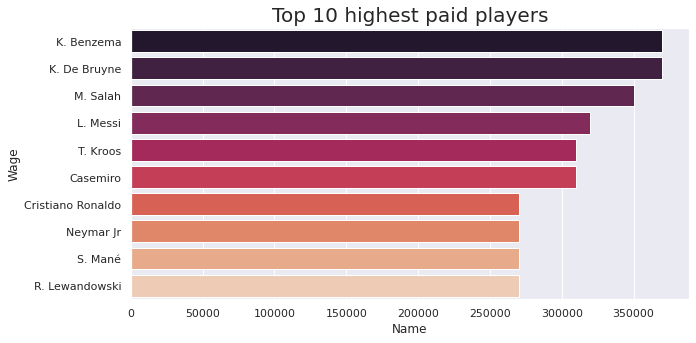

In [10]:
plt.figure(figsize=(10,5))
sns.set()
sns.barplot(x = topwage['Wage'], y =topwage.index,  palette = 'rocket')
plt.title('Top 10 highest paid players', fontsize = 20)
plt.xlabel('Name', fontsize =12)
plt.ylabel('Wage', fontsize =12)

2. analyze which club or national team had the most unexceptional players based on overall rating attribute

In [11]:
topclubs = vdata[['Club','Nationality','Overall']].nlargest(10,'Overall', keep = 'first')
topclubs = topclubs.set_index('Club')
topclubs

,Nationality,Overall
Club,,
Paris Saint-Germain,Argentina,93
FC Bayern München,Poland,92
Manchester United,Portugal,91
Paris Saint-Germain,Brazil,91
Liverpool,Egypt,91
Paris Saint-Germain,France,91
Atlético de Madrid,Slovenia,91
Manchester City,Belgium,91
Real Madrid CF,France,90


2.2 Top 10 Players with 90 prcentile overall

In [12]:
# 90th percentile player overall in each club
value_p90 = data[['Overall']].groupby(data['Club']).quantile(0.9)
value_p90.rename({'Overall': '90_val'}, axis=1, inplace=True)
#top10 club with highest 90th percentile player value
top_value_p90 = value_p90.nlargest(10, '90_val')
top_value_p90

,90_val
Club,
4,90.4
36,88.6
31,88.4
79,88.3
33,87.5
1,86.0
50,86.0
15,85.5
51,85.0


In [13]:
# Create new dataset with top 10 clubs with highest values on 90th percentile 
# and add original df columns to it
df2 = top_value_p90.merge(data[['Name', 'Overall', 'Club']], left_on='Club', right_on='Club')
df2.head(10)


,Club,90_val,Name,Overall
0,4,90.4,G. Coupet,75
1,4,90.4,Sergio Ramos,86
2,4,90.4,L. Messi,93
3,4,90.4,Neymar Jr,91
4,4,90.4,Danilo Pereira,80
5,4,90.4,M. Icardi,81
6,4,90.4,L. Kurzawa,75
7,4,90.4,J. Draxler,79
8,4,90.4,L. Paredes,80
9,4,90.4,Marquinhos,88


2.3 find the players with overall >= 90th percentile of each club and nationality

In [14]:
#Group per club and find players with Overall >= 90th percentile of each club
df2_90 = df2.loc[df2['Overall']>= df2['90_val']]
top_df2_90 = df2_90.groupby(by = ['Club', '90_val'])[['90_val']].count()
top_df2_90.rename({'90_val': 'Count'}, axis=1, inplace=True)
top_df2_90.head(10)

,,Count
Club,90_val,
1,86.0,5
4,90.4,3
15,85.5,3
31,88.4,3
33,87.5,3
36,88.6,4
50,86.0,6
51,85.0,4
66,85.0,6


In [15]:
top_df2_90.reset_index(inplace= True)
top_df2_90 = top_df2_90.nlargest(10, '90_val')
top_df2_90

,Club,90_val,Count
1,4,90.4,3
5,36,88.6,4
3,31,88.4,3
9,79,88.3,3
4,33,87.5,3
0,1,86.0,5
6,50,86.0,6
2,15,85.5,3
7,51,85.0,4
8,66,85.0,6


In [16]:
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

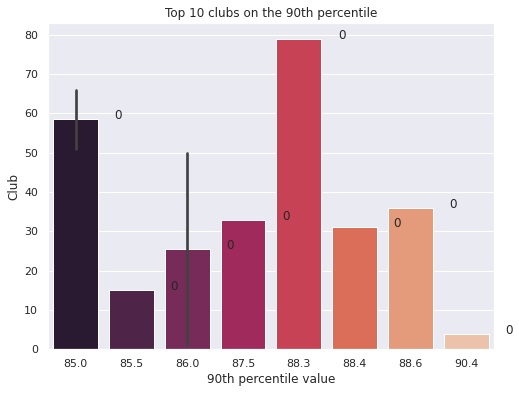

In [17]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x= '90_val', y = 'Club', data = top_df2_90, palette = 'rocket')
plt.title('Top 10 clubs on the 90th percentile')
plt.xlabel('90th percentile value')        
show_values_on_bars(ax,"h", 0.3)

3.An analysis of the players based on the Value and Wages.

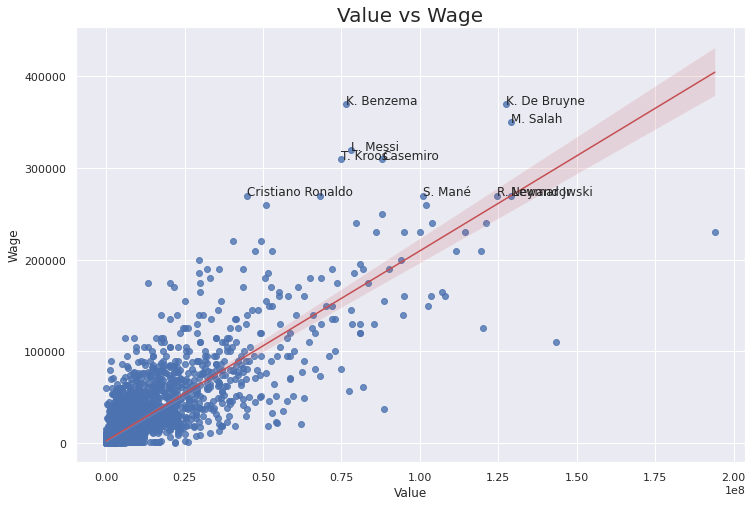

In [18]:
plt.figure(figsize=(12,8))
labels = topwage.index
ax = sns.regplot(x = 'Value', y = 'Wage' , data =vdata,
            line_kws={"color":"r","alpha":1,"lw":1.5})
plt.title('Value vs Wage', fontsize = 20)

# labeling the top 10 highest paid players
for i, label in enumerate(labels):
    ax.annotate(label, (topwage['Value'][i],topwage['Wage'][i]))

4.Evaluate the co-relation between age and overall rating of the players.

In [19]:
data.corr()

,ID,Age,Nationality,Overall,Potential,Club,Value,Wage,Total_stats,Height,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
ID,1.000000,-0.743595,0.074089,-0.419303,0.097394,0.145416,-0.162308,-0.280100,-0.274461,-0.086119,...,-0.135259,-0.180150,-0.180150,-0.180150,-0.135259,-0.124639,-0.155779,-0.155779,-0.155779,-0.124639
Age,-0.743595,1.000000,0.047820,0.402883,-0.337071,0.007853,0.103066,0.211277,0.236381,0.085844,...,0.120406,0.170358,0.170358,0.170358,0.120406,0.116343,0.164212,0.164212,0.164212,0.116343
Nationality,0.074089,0.047820,1.000000,-0.127720,-0.190959,0.206847,-0.091320,-0.102880,-0.052854,-0.058908,...,-0.035466,-0.045420,-0.045420,-0.045420,-0.035466,-0.034020,-0.035648,-0.035648,-0.035648,-0.034020
Overall,-0.419303,0.402883,-0.127720,1.000000,0.637761,-0.394967,0.644916,0.671395,0.641566,0.044520,...,0.455730,0.475334,0.475334,0.475334,0.455730,0.427096,0.385967,0.385967,0.385967,0.427096
Potential,0.097394,-0.337071,-0.190959,0.637761,1.000000,-0.454055,0.532936,0.495821,0.392637,-0.003819,...,0.298706,0.290812,0.290812,0.290812,0.298706,0.276589,0.212860,0.212860,0.212860,0.276589
Club,0.145416,0.007853,0.206847,-0.394967,-0.454055,1.000000,-0.288415,-0.343922,-0.238252,-0.027449,...,-0.160378,-0.167381,-0.167381,-0.167381,-0.160378,-0.148363,-0.129665,-0.129665,-0.129665,-0.148363
Value,-0.162308,0.103066,-0.091320,0.644916,0.532936,-0.288415,1.000000,0.842468,0.394743,0.026681,...,0.270120,0.279513,0.279513,0.279513,0.270120,0.249927,0.212565,0.212565,0.212565,0.249927
Wage,-0.280100,0.211277,-0.102880,0.671395,0.495821,-0.343922,0.842468,1.000000,0.421524,0.030717,...,0.290127,0.304330,0.304330,0.304330,0.290127,0.269671,0.237063,0.237063,0.237063,0.269671
Total_stats,-0.274461,0.236381,-0.052854,0.641566,0.392637,-0.238252,0.394743,0.421524,1.000000,-0.340893,...,0.867872,0.823420,0.823420,0.823420,0.867872,0.818527,0.686121,0.686121,0.686121,0.818527
Height,-0.086119,0.085844,-0.058908,0.044520,-0.003819,-0.027449,0.026681,0.030717,-0.340893,1.000000,...,-0.286548,-0.177689,-0.177689,-0.177689,-0.286548,-0.233421,-0.040043,-0.040043,-0.040043,-0.233421


In [20]:
data['Age'].corr(data['Overall'])

0.40288349810983576

In [21]:
heatmap_data = data[['Age','Overall']].corr()

In [22]:
heatmap_data

,Age,Overall
Age,1.000000,0.402883
Overall,0.402883,1.000000


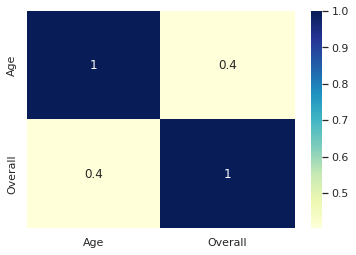

In [23]:
# plotting correlation heatmap
dataplot = sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True)
plt.show()

5.Determine which clubs provide the highest salaries to players

In [24]:
club_value = data[['Wage']].groupby(vdata['Club']).apply(np.sum)
top_club_value = club_value.nlargest(20,'Wage', keep = 'first')
top_club_value

,Wage
Club,
Liverpool,2.238024
Real Madrid CF,2.190392
Atlético de Madrid,2.092016
Rayo Vallecano,2.017185
Borussia Dortmund,1.961164
Leicester City,1.917456
West Bromwich Albion,1.917185
VfL Wolfsburg,1.902842
FC Barcelona,1.839107


Text(0.5, 1.0, '20 Clubs which provide highest salary to Players')

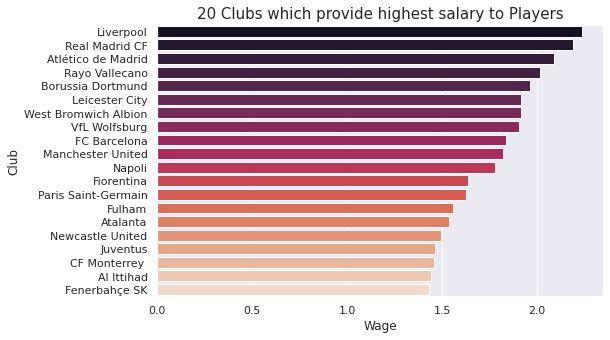

In [25]:
plt.figure(figsize=(8,5))
sns.barplot(x= 'Wage', y = top_club_value.index, data = top_club_value, palette = 'rocket')
plt.title('20 Clubs which provide highest salary to Players', fontsize = 15)

# 7. Visualization of the comparison between two or more players based on their attributes or skills.

In [26]:
# Rewritting in function:
def plot_radar(name_list, features):
    N = len(features) 
    
    # Assign series colors, title here
    series_color = ['r', 'b', 'g', 'y', 'o'] 
    ### just in case you have more than 2 series to compare, 
    ### scrappy way of listing series colors, need a more dynamic approach
    text = 'Comparing Player Skills'
     
    # Clear the plot to start with a blank canvas.
    plt.clf()
    fig=plt.figure(figsize=(10,10))

    # Initialise the spider plot
    ax = fig.add_subplot(111, polar=True)
    
    # Loop through the name list
    for idx, name in enumerate(name_list,0):
    #Set the angle of polar axis and close the plot
        angles=np.linspace(0, 2*np.pi, N, endpoint=False)
        angles=np.concatenate((angles,[angles[0]]))
        
        #Define the stats for each series and close the plot in radar chart.
        stats = data[labels].loc[data['Name']==name]
        stats = stats.values
        stats = np.concatenate((stats[0],[stats[0][0]]))
        #Plot series 1,2,3,4....:
        ax.plot(angles, stats, 'o-', 
                linewidth=2, color = series_color[idx], 
                label=name)  #label here is to populate the legend key 
        ax.fill(angles, stats, alpha=0.3, 
                color =  series_color[idx])
        idx+=1

### Plot formatting    
    # Draw one axe per variable + adjust the labels positioning
    plt.xticks(angles[:-1], labels,horizontalalignment='center', 
                verticalalignment='bottom')

    # Draw ylabels    
    ax.set_rlabel_position(0)
    plt.yticks(  [20, 40, 60, 80],
       ['20', '40', '60', '80'], color= 'k', size=8, weight = 'bold')
    plt.ylim(0,100)

    #Set title and theta grids
    ax.set_thetagrids(angles * 180/np.pi, features)
    ax.set_title(text, weight='bold', fontsize = 12,
                  horizontalalignment='center', 
                  verticalalignment='top')
    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))    

    return   

In [27]:
top2 = data.nlargest(2, [ 'Ball Control', 'Overall',])
top2.set_index('Name', inplace = True)
labels = ['Dribbling', 'Ball Control','Acceleration', 'Shot Power', 'Stamina', 'Jumping', 'Agility', 'Sprint Speed',  'Positioning']
top2_data = top2[labels]
top2_data

,Dribbling,Ball Control,Acceleration,Shot Power,Stamina,Jumping,Agility,Sprint Speed,Positioning
Name,,,,,,,,,
L. Messi,96,96,91,86,72,68.0,91.0,80,93
Neymar Jr,95,95,93,80,81,64.0,96.0,89,86


<Figure size 432x288 with 0 Axes>

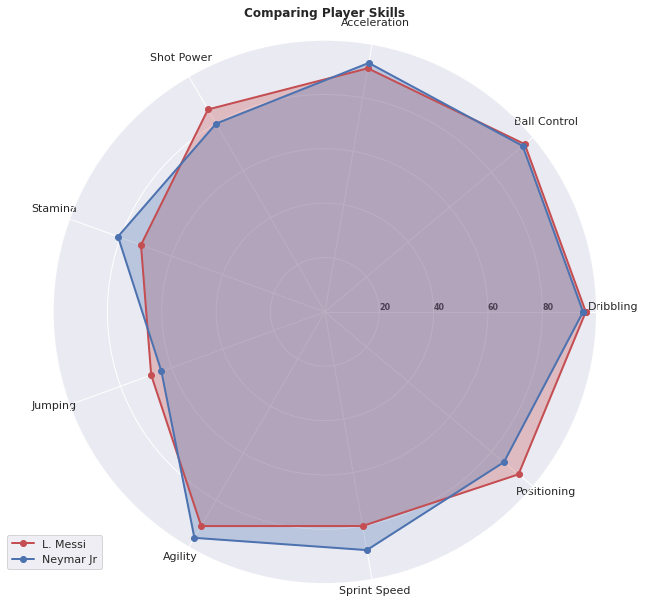

In [28]:
labels = ['Dribbling', 'Ball Control','Acceleration', 'Shot Power', 'Stamina', 'Jumping', 'Agility', 'Sprint Speed',  'Positioning']
plot_radar(['L. Messi', 'Neymar Jr'], labels)

In [29]:
top2 = data.nlargest(2, [ 'Ball Control', 'Overall',])
top2.set_index('Name', inplace = True)
labels = ['Dribbling', 'Ball Control','Acceleration', 'Shot Power', 'Stamina', 'Jumping', 'Agility', 'Sprint Speed',  'Positioning']
top2_data = top2[labels]
top2_data

,Dribbling,Ball Control,Acceleration,Shot Power,Stamina,Jumping,Agility,Sprint Speed,Positioning
Name,,,,,,,,,
L. Messi,96,96,91,86,72,68.0,91.0,80,93
Neymar Jr,95,95,93,80,81,64.0,96.0,89,86


In [30]:
data.columns[15:37]

Index(['Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Power', 'Jumping', 'Stamina', 'Long Shots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Defensive awareness', 'Standing Tackle', 'Sliding tackle'],
      dtype='object')

# 9 .Representation for Skills of players

9.1 Ball Control

In [31]:
vdata[ 'Ball Control'].value_counts().head(5)

62    660
60    632
63    616
65    582
64    574
Name: Ball Control, dtype: int64

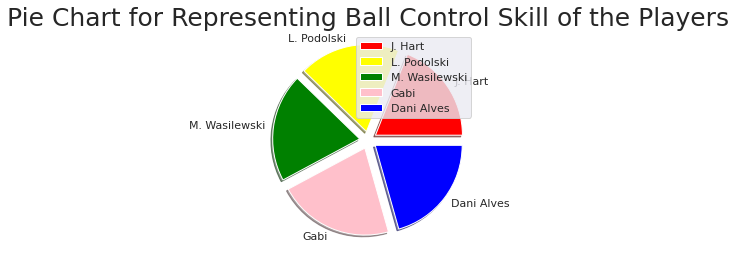

In [32]:
labels = [vdata.Name[65], vdata.Name[64], vdata.Name[63], vdata.Name[62], vdata.Name[60]] 
size = [582, 574, 616, 660, 632]
colors = ['red', 'yellow', 'green', 'pink', 'blue']
explode = [0.1, 0.1, 0.1, 0.1, 0.1]

plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True)
plt.title('Pie Chart for Representing Ball Control Skill of the Players', fontsize = 25)
plt.legend()
plt.show()

9.2 Stamina

In [33]:
data['Stamina'].value_counts().head(5)

68    461
65    453
70    421
64    393
62    388
Name: Stamina, dtype: int64

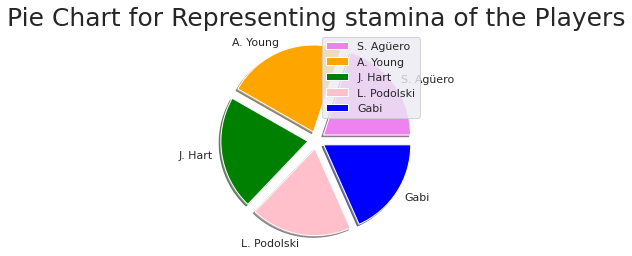

In [34]:
labels = [vdata.Name[70], vdata.Name[68], vdata.Name[65], vdata.Name[64], vdata.Name[62]] 
size = [441, 486, 469, 417, 407]
colors = ['Violet', 'Orange', 'green', 'pink', 'blue']
explode = [0.1, 0.1, 0.1, 0.1, 0.1]

plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True)
plt.title('Pie Chart for Representing stamina of the Players', fontsize = 25)
plt.legend()
plt.show()

# 10. count of players on the basis of height and weight

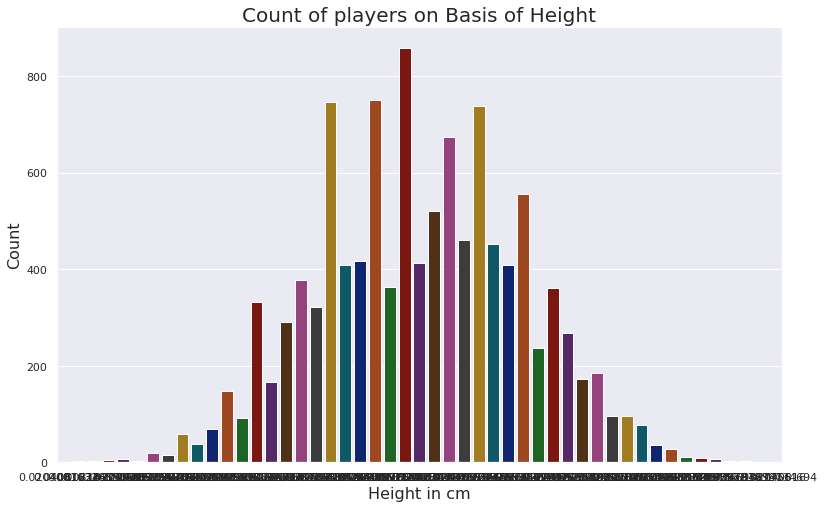

In [35]:
plt.figure(figsize = (13, 8))
ax = sns.countplot(x = 'Height', data = data, palette = 'dark')
ax.set_title(label = 'Count of players on Basis of Height', fontsize = 20)
ax.set_xlabel(xlabel = 'Height in cm', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

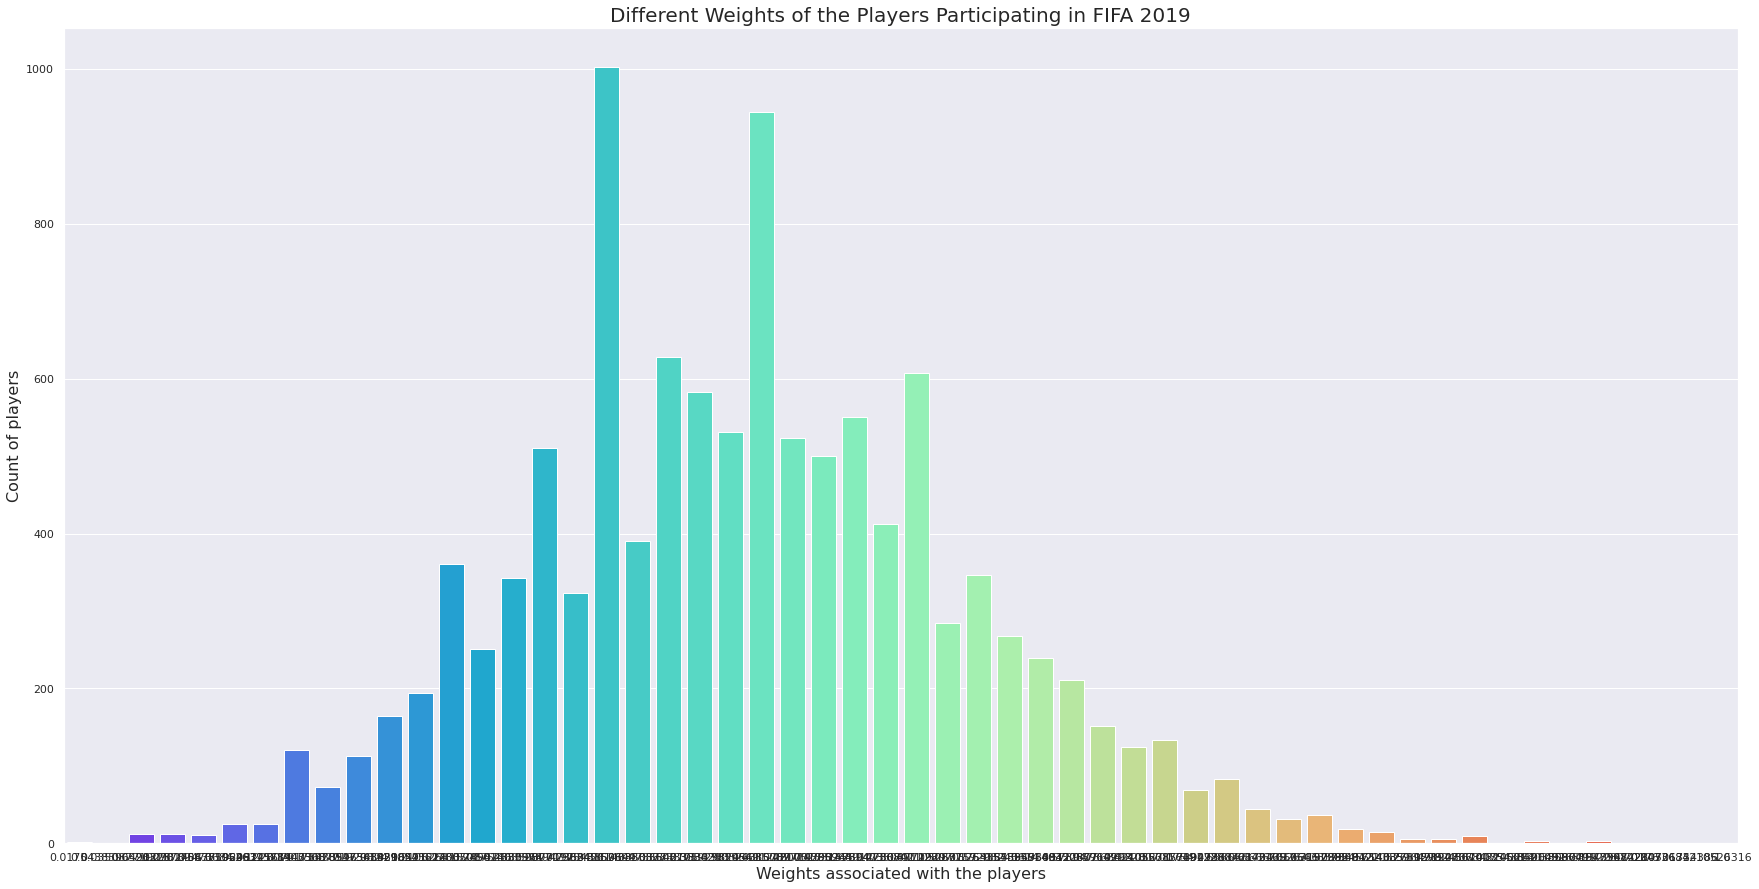

In [36]:
# To show Different body weight of the players 

plt.figure(figsize = (30, 15))
sns.countplot(x = 'Weight', data = data, palette = 'rainbow')
plt.title('Different Weights of the Players Participating in FIFA 2019', fontsize = 20)
plt.xlabel('Weights associated with the players', fontsize = 16)
plt.ylabel('Count of players', fontsize = 16)
plt.show()

# 11 Comparison for Overall And Potential

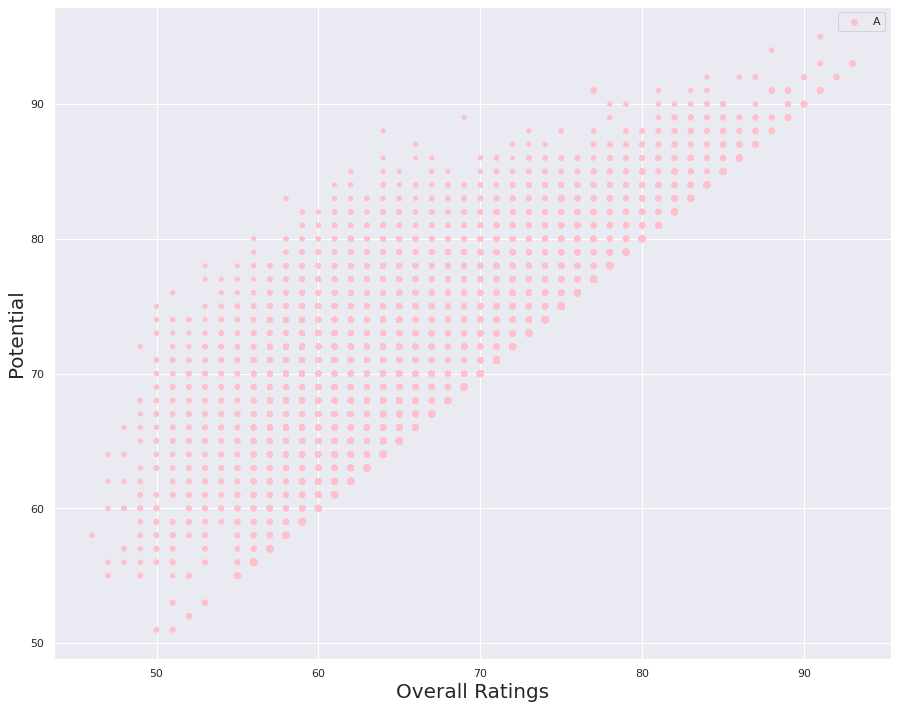

In [37]:
plt.figure(figsize = (15, 12))
plt.scatter(data['Overall'], data['Potential'], s = data['Age'], c = 'pink')
plt.xlabel('Overall Ratings', fontsize = 20)
plt.ylabel('Potential', fontsize = 20)
plt.legend('Age')
plt.show()

# 13 Comparision between ball control and dribbing

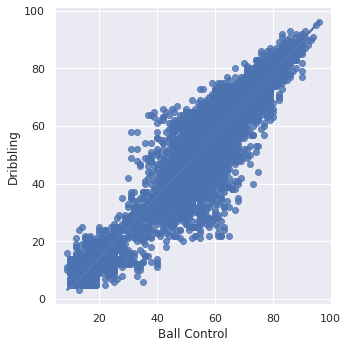

In [38]:
sns.lmplot(x ='Ball Control', y ='Dribbling', data = data)

# 14. Does Age affect overall rating?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


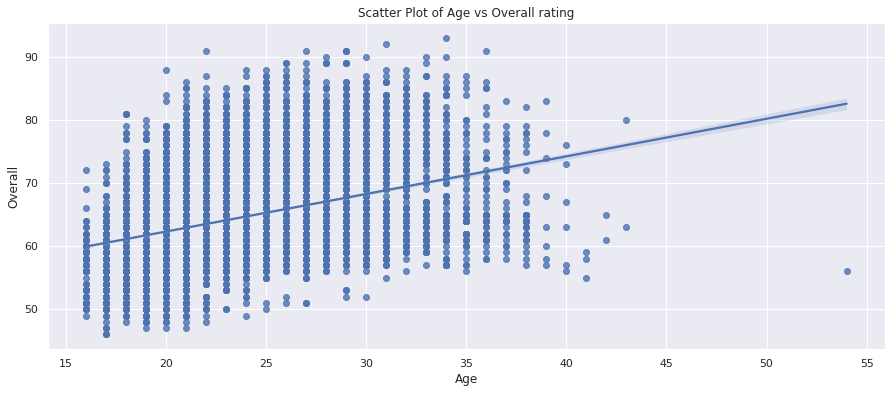

In [39]:
plt.figure(1 , figsize = (15 , 6))
sns.regplot(data['Age'] , data['Overall'])
plt.title('Scatter Plot of Age vs Overall rating')
plt.show()

In [40]:
c= ['LS', 'ST','RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM',
       'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB']

In [41]:
positions = []
for row in range(data.shape[0]):
  try:
    positions.append(c[ np.argmax(data.loc[row, data.columns[37:]].values)])
  except:
    positions.append(positions[-1])

In [42]:
data['Position'] = positions

In [43]:
pos_dict = {
    'Goalkeeper': ['GK'],
    'Defender': ['LWB', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB'],
    'Midfielder': ['LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 
                   'RCM', 'RM', 'LDM', 'CDM', 'RDM'],
    'Attacker': ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW']
}

data[['ID','Position']].head()

,ID,Position
0,2,LWB
1,241,LW
2,965,LS
3,1179,LCM
4,1747,LDM


In [44]:
def simplify_position(position):
    for key in pos_dict:
        if position in pos_dict[key]:
            return key
        else:
            continue
data['SimplifiedPosition']= data['Position'].apply(simplify_position)

In [45]:
data[['Position','SimplifiedPosition']].iloc[:10]

,Position,SimplifiedPosition
0,LWB,Defender
1,LW,Attacker
2,LS,Attacker
3,LCM,Midfielder
4,LDM,Midfielder
5,LS,Attacker
6,LDM,Midfielder
8,LDM,Midfielder
9,LWB,Defender
10,LDM,Midfielder


In [46]:
data['SimplifiedPosition'].value_counts()

Defender      4914
Midfielder    3443
Attacker      2944
Name: SimplifiedPosition, dtype: int64

In [47]:
data.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Total_stats',
       'Height', 'Weight', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing',
       'Ball Control', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions',
       'Balance', 'Shot Power', 'Jumping', 'Stamina', 'Long Shots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Defensive awareness', 'Standing Tackle', 'Sliding tackle', 'LS', 'ST',
       'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM',
       'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'Position', 'SimplifiedPosition'],
      dtype='object')

In [48]:
POS = data.SimplifiedPosition.unique()
CLUBS = data.Club.unique()
RATING = data.Overall.unique()
VALUE = data.Value.unique()
BUDGET = 100000000
pos_available = {
    'DEF': 5,
    'FWD': 3,
    'MID': 5,
}

# Predict player's overall value based on the linear regression and comparison with values given in dataset.

In [49]:
data1 = pd.read_csv('https://raw.githubusercontent.com/ShalakaPawar/Football-Data-Analysis/main/DS_final2.csv', index_col=0)

In [50]:
data1.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Total_stats',
       'Height', 'Weight', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing',
       'Ball Control', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions',
       'Balance', 'Shot Power', 'Jumping', 'Stamina', 'Long Shots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Defensive awareness', 'Standing Tackle', 'Sliding tackle', 'LS', 'ST',
       'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM',
       'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB'],
      dtype='object')

In [51]:
variables = data1.iloc[:, 15:37].columns
x = data1[variables].values

In [52]:
target = data1['Overall']
y = target.values

In [53]:
data1.columns[15:37]

Index(['Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Power', 'Jumping', 'Stamina', 'Long Shots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Defensive awareness', 'Standing Tackle', 'Sliding tackle'],
      dtype='object')

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)
print('Size of data:')
print ('The training data has {0} rows and {1} columns'.format(x_train.shape[0],x_train.shape[1]))
print ('---------------------------------------------')
print ('The test data has {0} rows and {1} columns'.format(x_test.shape[0],x_test.shape[1]))

Size of data:
The training data has 9040 rows and 22 columns
---------------------------------------------
The test data has 2261 rows and 22 columns


In [55]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [56]:
y_pred = lr.predict(x_test)
print (y_pred)

[85.48406911 62.85694802 60.26276513 ... 67.18196701 73.71656381
 63.93431957]


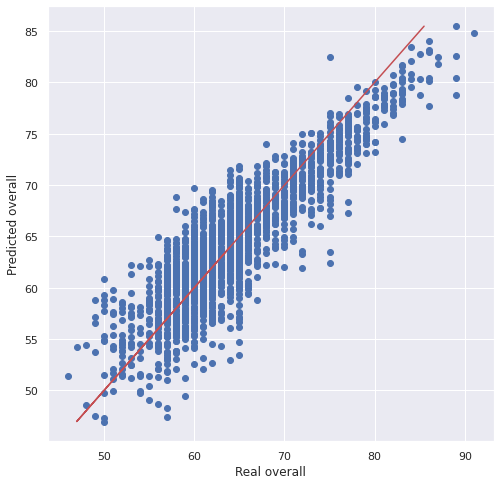

In [57]:
plt.figure(figsize = (8,8))
plt.xlabel ('Real overall')
plt.ylabel('Predicted overall')
plt.scatter(y_test,y_pred)
plt.plot(y_pred,y_pred, color = 'r')

In [58]:
results = pd.DataFrame({
    'Real overall': y_test,
    'Predicted overall': y_pred,
    'Difference': np.abs(y_test - y_pred)
})
results.head(10)

,Real overall,Predicted overall,Difference
0,89,85.484069,3.515931
1,62,62.856948,0.856948
2,58,60.262765,2.262765
3,78,75.365351,2.634649
4,62,65.669555,3.669555
5,54,58.118552,4.118552
6,70,72.033454,2.033454
7,65,65.937224,0.937224
8,60,56.955519,3.044481
9,62,62.428060,0.428060


## Evaluation Metrics

In [59]:
from prettytable import PrettyTable
 
# Specify the Column Names while initializing the Table
table = PrettyTable(["Metric", "Value"])
 
table.add_row(["Mean Aboslute Error", mean_absolute_error(y_test,y_pred)])
table.add_row(["Root Mean Squared Error", metrics.mean_squared_error(y_test,y_pred)])
table.add_row(["R2 score", r2_score(y_test, y_pred)])
 
print(table)

+-------------------------+--------------------+
|          Metric         |       Value        |
+-------------------------+--------------------+
|   Mean Aboslute Error   | 2.482835244417743  |
| Root Mean Squared Error | 9.991326051907066  |
|         R2 score        | 0.7798701236494607 |
+-------------------------+--------------------+


In [60]:
coef = pd.DataFrame(data = lr.coef_, index = variables, columns = ['Coef'])
coef.nlargest(10, 'Coef')

,Coef
Reactions,0.522433
Shot Power,0.153650
Ball Control,0.089188
Vision,0.059441
Jumping,0.029831
Standing Tackle,0.027974
Curve,0.022782
Acceleration,0.019071
Defensive awareness,0.017004
Dribbling,0.013905


### The most relevant variables (skills) to predict a player's overall score include: Reactions, Shot Power, BallControl, and Vision.

In [61]:
data['Dribbling']

0        73
1        77
2        50
3        26
4        14
         ..
11934    56
11935    66
11937    65
11938    56
11939    67
Name: Dribbling, Length: 11301, dtype: int64

In [62]:
# Create a random forest regressor
rf = RandomForestRegressor(n_jobs=-1, n_estimators=100)

rf.fit(x_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [63]:
y_pred = rf.predict(x_test)
print (y_pred)

[89.02 62.84 57.03 ... 71.62 76.57 64.55]


In [64]:
from prettytable import PrettyTable
 
# Specify the Column Names while initializing the Table
table = PrettyTable(["Metric", "Value"])
 
table.add_row(["Mean Aboslute Error", mean_absolute_error(y_test,y_pred)])
table.add_row(["Root Mean Squared Error", metrics.mean_squared_error(y_test,y_pred)])
table.add_row(["R2 score", r2_score(y_test, y_pred)])
 
print(table)

+-------------------------+--------------------+
|          Metric         |       Value        |
+-------------------------+--------------------+
|   Mean Aboslute Error   | 1.1646439628482972 |
| Root Mean Squared Error |  2.60890570544007  |
|         R2 score        | 0.9425203334006779 |
+-------------------------+--------------------+


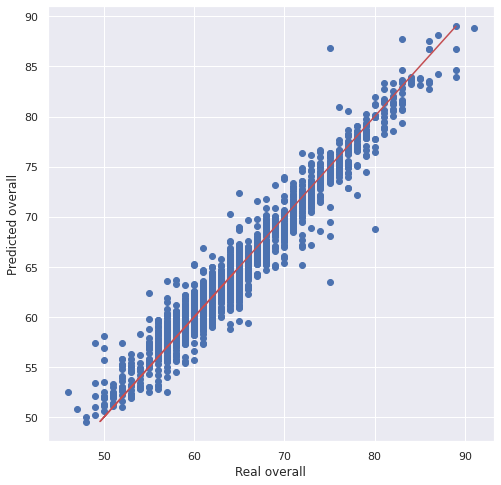

In [65]:
plt.figure(figsize = (8,8))
plt.xlabel ('Real overall')
plt.ylabel('Predicted overall')
plt.scatter(y_test,y_pred)
plt.plot(y_pred,y_pred, color = 'r')

In [66]:
results = pd.DataFrame({
    'Real overall': y_test,
    'Predicted overall': y_pred,
    'Difference': np.abs(y_test - y_pred)
})
results.head(10)

,Real overall,Predicted overall,Difference
0,89,89.02,0.02
1,62,62.84,0.84
2,58,57.03,0.97
3,78,77.27,0.73
4,62,60.53,1.47
5,54,54.15,0.15
6,70,70.13,0.13
7,65,64.38,0.62
8,60,59.31,0.69
9,62,62.81,0.81


# Feature Importance

In [67]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'Skills':variables, 'Importance':m.feature_importances_}
                       ).sort_values('Importance', ascending=False)

fi = rf_feat_importance(rf, x_train); 
fi[:]

,Skills,Importance
8,Reactions,0.754359
4,Ball Control,0.070838
20,Standing Tackle,0.022374
16,Positioning,0.020482
10,Shot Power,0.016510
15,Interceptions,0.015335
19,Defensive awareness,0.013656
0,Dribbling,0.012991
21,Sliding tackle,0.012608
12,Stamina,0.010540


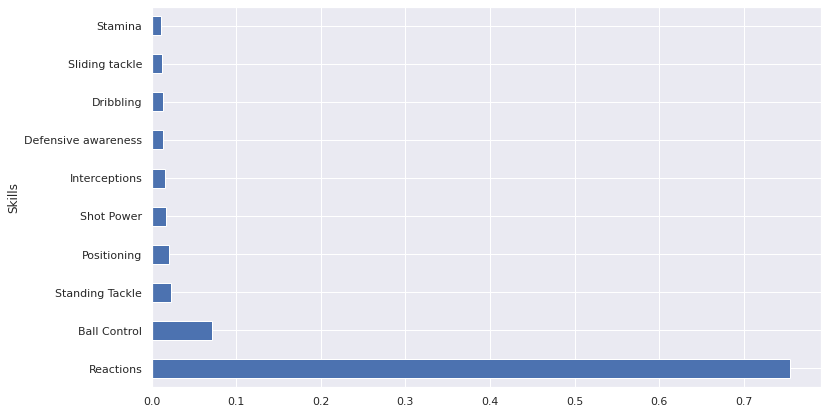

In [68]:
def plot_fi(fi): 
    return fi.plot('Skills', 'Importance', 'barh', figsize=(12,7), legend=False, color = 'b')

plot_fi(fi.nlargest(10, 'Importance'))